# AutoEncoders
- 인공 신경망을 활용하여 이미지를 인코딩 및 디코딩을 하는것
  - 기존 인공 신경망의 원리는 같지만 입력층와 출력층을 똑같이 하여 인코딩과 디코딩을 구현한다.
  - 이미지 데이터 말고도 다른 형태의 데이터도 입력가능하다.
  - 데이터간의 상관관계가 있을 수록 이미지 복원이 깔끔하게 된다
    - 보통 이미지는 픽셀간의 연관이 있기때문에 AutoEnoders을 사용하기 적합하다.
    - 단순한 이미지이면 선형 AutoEncoders를 써도 되지만 복잡한 이미지는 합성곱 AutoEncoders를 사용하는것이 좋다
  - 활용분야: 노이즈 제거, 이미지 압축, 부정거래 감지,PCA(데이터셋 차원 수 감소)

### Importing the libraries

In [37]:
import tensorflow as tf
from tensorflow .keras.models import Sequential,Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt # 그래프 생성
import numpy as np


### Loading the dataset
- dataset: mnist데이타 사용
  - https://keras.io/api/datasets/mnist/

In [38]:
from tensorflow.keras.datasets import mnist

In [39]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [40]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [41]:
x_train[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [42]:
y_train[0]

5

### Visualizing the images
- 이미지 시각화
  - 사람이 데이터를 분석하기 편하도록 데이터를 시각화해야한다.

1


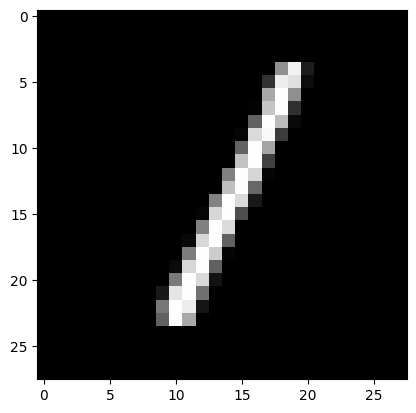

In [43]:
# random 인덱스 추출방법
i = np.random.randint(0,59999) # 데이터가 0~59999개
print(y_train[i])
plt.imshow(x_train[i],cmap='gray');

(10, 10)
(100,)


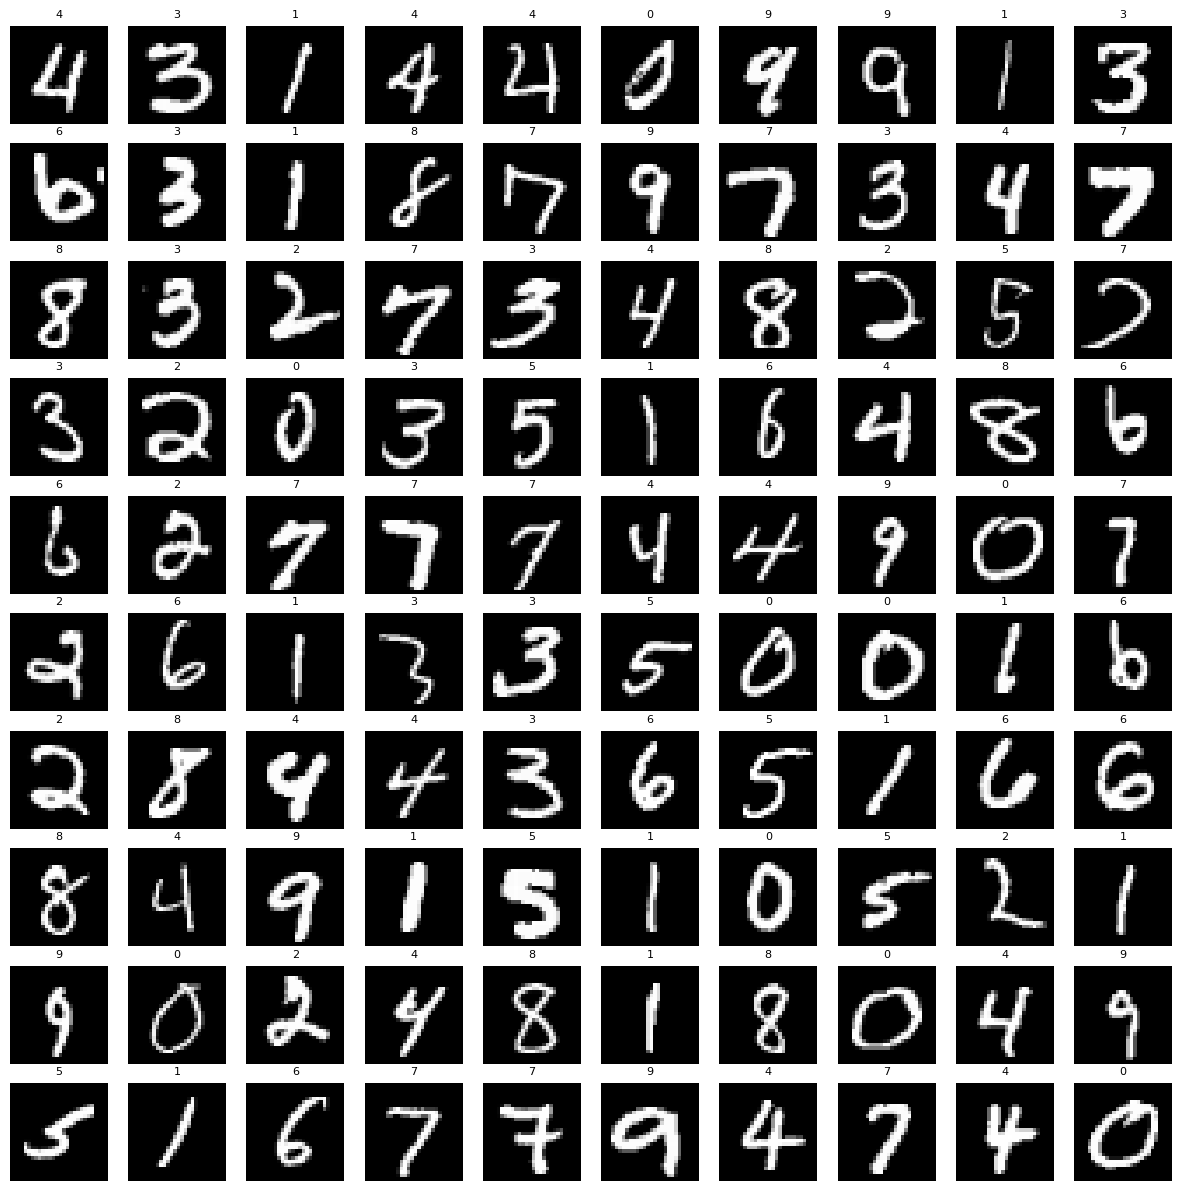

In [44]:
width = 10
height = 10
#fig(도표), axes
# plt.subplots는 그리드를 만드는 함수 매개변수 - (가로길이, 세로 길이, 각 서브 그래프 구분선의 크기)
# 가로에 서브 그래프 10개 세로에 서브 그래프 10개인 그리드 도표가 만들어졌다
fig, axes = plt.subplots(height,width,figsize=(15,15) )
print(axes.shape)
#(10,10) 형태의 그리드를 일렬로 세운다
axes = axes.ravel() # ->(10,10) -> 100
print(axes.shape)
# 각각의 서브 그래프들을 순회하면서 랜덤으로 데이터셋안에 있는 그림은 삽입한다.
for i in np.arange(0,width * height) : # 0~ 100까
  index = np.random.randint(0,59999)
  axes[i].imshow(x_train[index],cmap='gray')
  axes[i].set_title(y_train[index], fontsize=8)
  # axis('off')를 안할시 제목에 다른 정보들도 같이 기록되어 보기 안좋다.
  axes[i].axis('off')

### Pre-processing the images

In [45]:
# 픽셀은 0~255 크기를 갖는다
x_train[0].min(), x_train[0].max()

(0, 255)

In [46]:
# 0~1사이에 값이 있을 수 있도록 정규화해준다
x_train = x_train/255
x_test= x_test/255

In [47]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [48]:
x_train.shape[0], x_train.shape[1], x_train.shape[2]

(60000, 28, 28)

In [49]:
# 선형 인코더는 입력으로 모든 픽셀을 다 사용하기 때문에 행렬로 되어있는 데이터를 1차원 벡터로 변환해주어야한다
# reshape를 하면
x_train= x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_train.shape

(60000, 784)

In [50]:
# 선형 인코더는 입력으로 모든 픽셀을 다 사용하기 때문에 행렬로 되어있는 데이터를 1차원 벡터로 변환해주어야한다
x_test= x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
x_test.shape

(10000, 784)